In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

**Read in target data**

In [55]:
data = pd.read_csv("data/training_variants.csv",index_col='ID')

In [3]:
data.head()

,Gene,Variation,Class
ID,,,
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4


In [4]:
data.tail()

,Gene,Variation,Class
ID,,,
3316,RUNX1,D171N,4
3317,RUNX1,A122*,1
3318,RUNX1,Fusions,1
3319,RUNX1,R80C,4
3320,RUNX1,K83E,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gene       3321 non-null   object
 1   Variation  3321 non-null   object
 2   Class      3321 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 103.8+ KB


**Read in text data**

In [6]:
text = pd.read_csv('data/training_text.csv', sep = '\|\|', engine = 'python', names = ['ID','Text'], skiprows = 1, index_col = 'ID')

In [7]:
text.head()

,Text
ID,
0,Cyclin-dependent kinases (CDKs) regulate a var...
1,Abstract Background Non-small cell lung canc...
2,Abstract Background Non-small cell lung canc...
3,Recent evidence has demonstrated that acquired...
4,Oncogenic mutations in the monomeric Casitas B...


In [8]:
text.tail()

,Text
ID,
3316,Introduction Myelodysplastic syndromes (MDS) ...
3317,Introduction Myelodysplastic syndromes (MDS) ...
3318,The Runt-related transcription factor 1 gene (...
3319,The RUNX1/AML1 gene is the most frequent targe...
3320,The most frequent mutations associated with le...


In [9]:
text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    3316 non-null   object
dtypes: object(1)
memory usage: 51.9+ KB


Combine data sets

In [10]:
merged = data.merge(text, how='left', on='ID')

(array([568., 452.,  89., 686., 242., 275., 953.,  19.,  37.]),
 array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
        5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
 <BarContainer object of 9 artists>)

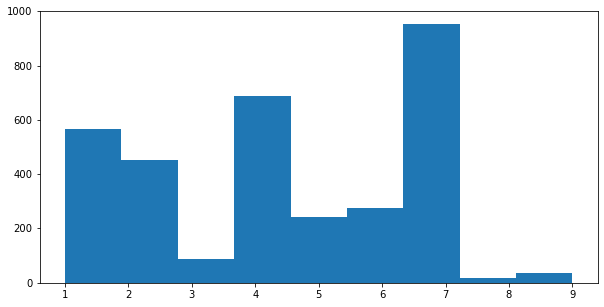

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(merged['Class'], bins=9)

<AxesSubplot:>

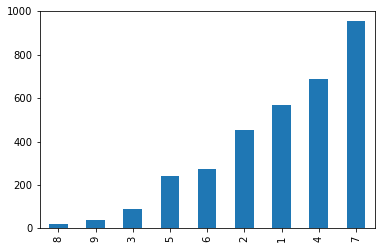

In [12]:
merged.Class.value_counts().sort_values().plot(kind = 'bar')
# df.letters.value_counts().sort_values().plot(kind = 'barh')

/home/shredder/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Class')

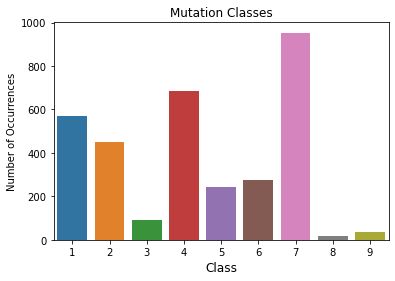

In [13]:
class_count  = merged['Class'].value_counts()
sns.barplot(class_count.index, class_count.values)
plt.title('Mutation Classes')
plt.ylabel('Number of Occurrences')
plt.xlabel('Class', fontsize=12)

In [18]:
merged[merged.isnull().any(axis=1)]

,Gene,Variation,Class,Text
ID,,,,
1109,FANCA,S1088F,1,NaN
1277,ARID5B,Truncating Mutations,1,NaN
1407,FGFR3,K508M,6,NaN
1639,FLT1,Amplification,6,NaN
2755,BRAF,G596C,7,NaN


In [19]:
# drop where text is missing
merged = merged.dropna(how='any', subset=['Text'])

In [20]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gene       3316 non-null   object
 1   Variation  3316 non-null   object
 2   Class      3316 non-null   int64 
 3   Text       3316 non-null   object
dtypes: int64(1), object(3)
memory usage: 129.5+ KB


/home/shredder/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


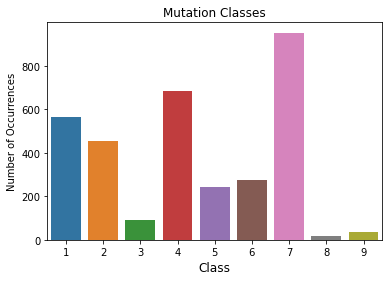

In [21]:
# redo plot after dropping missing text
class_count  = merged['Class'].value_counts()
sns.barplot(class_count.index, class_count.values)
plt.title('Mutation Classes')
plt.ylabel('Number of Occurrences')
plt.xlabel('Class', fontsize=12);

Try different models to classify - logistic reg, random forest, naive bayes - really want to try that one out
keep going with this project this is for a github test

**Vectorize and Train-Test Split**

In [22]:
text_list = merged.Text.tolist()

In [23]:
len(text_list)

3316

In [24]:
# initial vectorize
vectorizer = CountVectorizer()

In [25]:
X = vectorizer.fit_transform(text_list)

In [26]:
X.shape

(3316, 155732)

In [27]:
# vectorize with stopwords
vectorizer = CountVectorizer(stop_words='english')

In [29]:
X = vectorizer.fit_transform(text_list)

In [43]:
X.shape

(3316, 155436)

In [44]:
print(vectorizer.get_feature_names())

['00', '000', '0000', '0000000000000188', '00000001', '0000001', '000000100', '000001', '000002', '00000397', '000005', '000007', '00000o0', '00001', '0000112', '00001311', '0000149311', '0000208', '00002644', '00003', '00003450', '00004', '00005', '00006', '0000614', '0000645', '00006559', '00008', '0000839', '00009', '000096', '0000965', '0000b', '0000o', '0001', '000100020003', '000102', '0001042', '00011', '000115', '0001171', '00012', '0001217', '00014', '000148', '00015', '00016', '000161', '000175', '00018', '000182', '000183', '00019', '000193', '000194', '0001a', '0001d', '0001e', '0001f', '0001g', '0001h', '0002', '000202464', '000205', '0002050', '00020503', '0002079', '00021', '00021427', '0002158', '000219', '000245', '000249893', '00025', '000261', '000267', '000278', '00028', '00029', '0003', '00030', '0003019', '0003052', '0003073', '000321', '0003254', '00033', '00033740', '00034', '0003529', '000357129', '000369266', '00037', '000389', '0004', '000400403', '000404', '

In [30]:
y = merged['Class']

In [31]:
type(y)

pandas.core.series.Series

In [32]:
y[:5]

ID
0    1
1    2
2    2
3    3
4    4
Name: Class, dtype: int64

In [39]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=88)

**Model 1 - Naive Bayes**

In [42]:
model = MultinomialNB()

In [43]:
model.fit(X_train,y_train)

MultinomialNB()

In [44]:
print(model.predict(X_test[:5]))

[6 2 9 5 2]


In [45]:
print(model.predict(X_test[-5:]))

[2 4 7 5 7]


In [52]:
model.predict_proba(X_train[0])

array([[0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [54]:
model.predict_proba(X_test[900])


array([[1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        9.32859155e-251, 0.00000000e+000, 6.45502249e-184,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [48]:
model.score(X_test, y_test)

0.5859296482412061